In [53]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [54]:
convert = pd.read_csv('/Users/judithha/Desktop/GAWB_Wave.csv')

In [63]:
#SAMPLE DOWN NON-RESPONDERS TO GET A BALANCE TARGET VARIABLE & REMOVE IRRELEVANT FEATURES
Conversion = convert.loc[convert['Wave_Activation'] == 1]
Non_conv = convert.loc[convert['Wave_Activation'] == 0]
NC_sampled= Non_conv.sample(n=4300, random_state=12)
convert2 = pd.concat([Conversion,NC_sampled], ignore_index=True)

del convert2['Record'] #remove this column as it's just a record ID, not a feature


In [64]:
X = convert2.iloc[:,0:12].values
y = convert2.iloc[:,12].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sub,y,test_size=0.50,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)
coef = classifier.coef_[0]
print (coef)
intercept = classifier.intercept_
print (intercept)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

classifier.predict_proba(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[ 0.20567532 -0.06666141  0.38441004  0.28864392 -0.08350005 -0.09781114
  0.17737462 -0.22733847]
[0.00567501]
             precision    recall  f1-score   support

          0       0.61      0.61      0.61      2147
          1       0.61      0.61      0.61      2152

avg / total       0.61      0.61      0.61      4299



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [65]:
model = sm.Logit(y, X, maxiter=100)
 
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.652807
         Iterations 8


In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 8597
Model:                          Logit   Df Residuals:                     8585
Method:                           MLE   Df Model:                           11
Date:                Sat, 26 Jan 2019   Pseudo R-squ.:                 0.05820
Time:                        17:34:05   Log-Likelihood:                -5612.2
converged:                       True   LL-Null:                       -5959.0
                                        LLR p-value:                1.268e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3206      0.047      6.842      0.000       0.229       0.412
x2            -0.2668      0.046     -5.788      0.000      -0.357      -0.176
x3            -0.0804      0.064     -1.259      0.208      -0.205       0.045
x4             0.0109      0.006      1.854      0.064      -0.001       0.022
x5             1.9313      0.233      8.297      0.000       1.475       2.387
x6             0.1490      0.014     10.641      0.000       0.122       0.176
x7            -0.1549      0.044     -3.486      0.000      -0.242      -0.068
x8             0.0947      0.068      1.402      0.161      -0.038       0.227
x9            -0.1569      0.052     -3.011      0.003      -0.259      -0.055
x10            0.1077      0.074      1.451      0.147      -0.038       0.253
x11            0.3673      0.053      6.899      0.000       0.263       0.472
x12           -0.0004   3.15e-05    -11.380      0.000      -0.000      -0.000
==============================================================================
"""

In [67]:
convert2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 13 columns):
OEM                  8597 non-null int64
CC                   8597 non-null int64
ListenerPrefs        8597 non-null int64
StreamingHrs         8597 non-null float64
EverStreamed         8597 non-null int64
PrevDD               8597 non-null int64
IncomeOver75k        8597 non-null int64
DeactFinancial       8597 non-null int64
DeactNotListening    8597 non-null int64
DeactValue           8597 non-null int64
DiscountAtDeact      8597 non-null int64
Tenure               8597 non-null int64
Wave_Activation      8597 non-null int64
dtypes: float64(1), int64(12)
memory usage: 873.2 KB


In [71]:
X_sub = convert2.loc[:,["OEM", "CC", "EverStreamed", "PrevDD", "IncomeOver75k", "DeactNotListening", "DiscountAtDeact", "Tenure"]].values
y = convert2.loc[:,["Wave_Activation"]].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sub,y,test_size=0.50,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)
coef = classifier.coef_[0]
print (coef)
intercept = classifier.intercept_
print (intercept)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

classifier.predict_proba(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[ 0.20567532 -0.06666141  0.38441004  0.28864392 -0.08350005 -0.09781114
  0.17737462 -0.22733847]
[0.00567501]
             precision    recall  f1-score   support

          0       0.61      0.61      0.61      2147
          1       0.61      0.61      0.61      2152

avg / total       0.61      0.61      0.61      4299



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

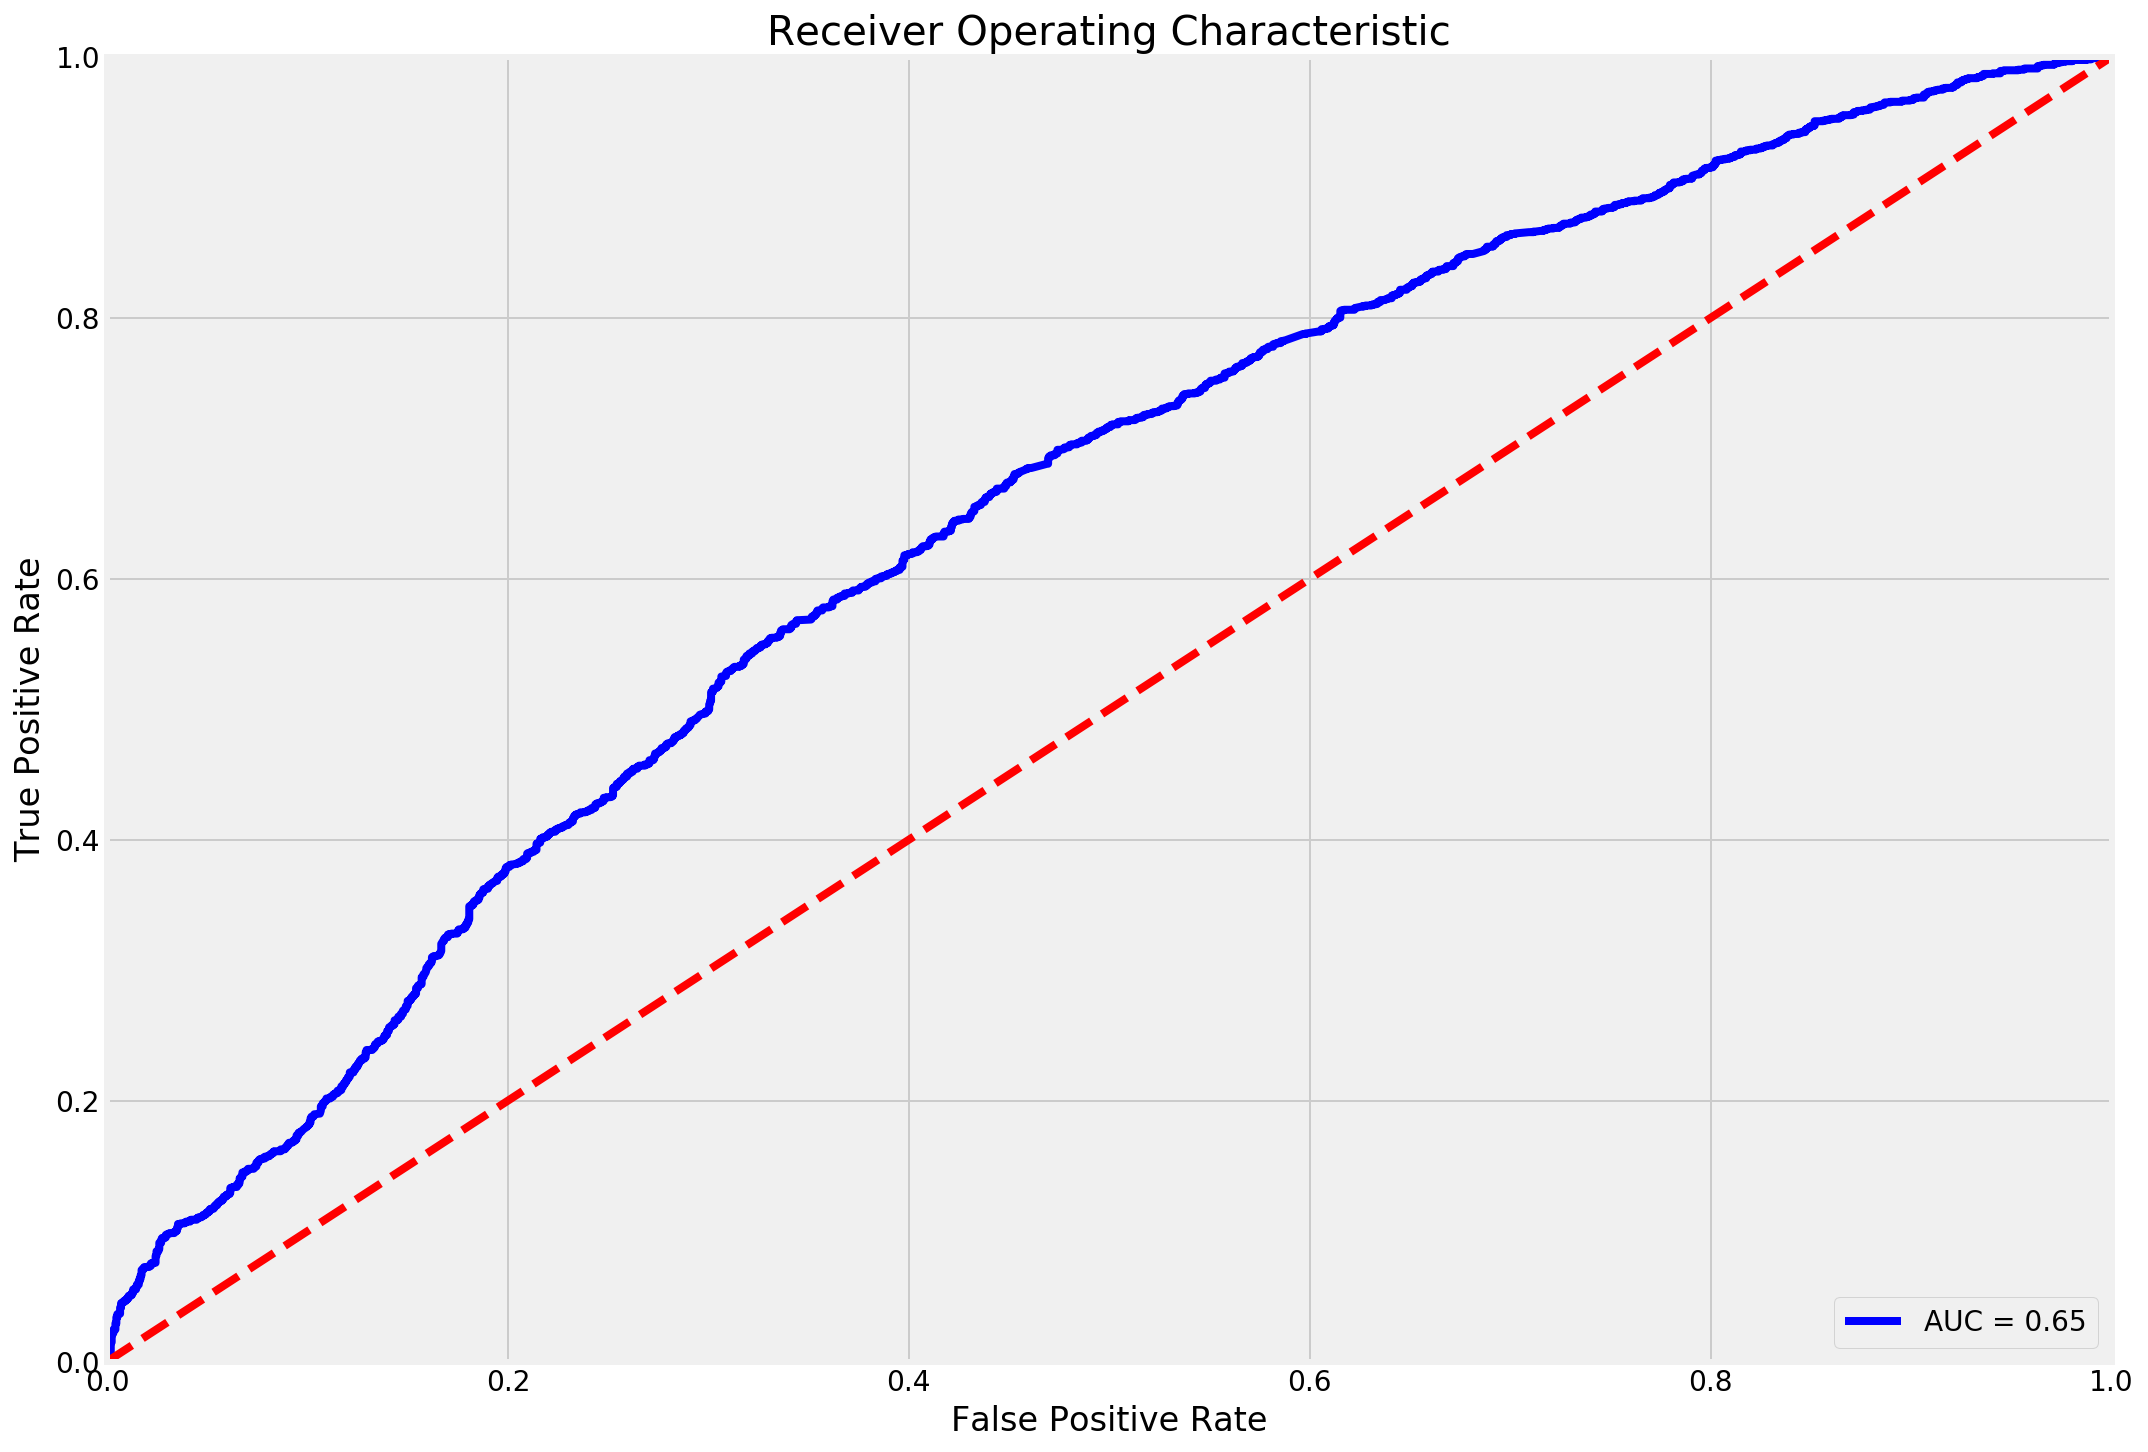

In [73]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics


probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()